In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#data_hh = pd.read_csv('C:/Users/midadmin/Downloads/IDE/data_hh_analysis/data/hh_database.csv', sep=';')
data_hh = pd.read_csv('../data_hh_analysis/data/hh_database.csv', sep=';')
hh_df = data_hh.copy()
print(hh_df.shape)

(44744, 12)


In [6]:
def get_education(arg):
   
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
        
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)
print(hh_df['Образование'].value_counts()['среднее'])

559


In [7]:
def get_gender(arg):
    arg_list = arg.split(' , ')
    gender = ''
    #old = ''
    if 'Мужчина' == arg_list[0]:
        gender = 'М'
    else:
        gender = 'Ж'
    return gender
 
def get_old(arg):
    arg_list = arg.split(' , ')
    
    old = ''
    
    old_list = arg_list[1][1:].split(' ')    
    old = int(old_list[0])
    #print(old) 

    return old

hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_old)
#print(hh_df['Пол'],hh_df['Возраст'])
print(hh_df['Возраст'].mean())
hh_df = hh_df.drop(['Пол, возраст'], axis=1)
#print(hh_df[(hh_df['Пол']!='')&(hh_df['Возраст']>0)])

32.19674146254246


In [8]:
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df = hh_df.drop('Опыт работы', axis=1)
#print(hh_df['Опыт работы (месяц)'].median())

In [9]:
def get_town(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    arg_splitted = arg.split(' , ')[0]
    if arg_splitted =='Москва':
        return 'Москва'
    elif arg_splitted == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif arg_splitted in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
    return arg_splitted

def get_removal(arg):
    #phrase_list = ['не готов к переезду','не готова к переезду']
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

def get_travel(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_town)   
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_removal)   
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_travel) 
#print(hh_df['Город'].value_counts()) 
#print(hh_df['Готовность к переезду'].value_counts()) 
#print(hh_df[(hh_df['Готовность к переезду']==True) & (hh_df['Готовность к командировкам']==True)]['Город'])
#hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

In [10]:
def get_full_employment(arg):
    if 'полная занятость' in arg:
        return True
    return False

def get_part_time_employment(arg):
    if 'частичная занятость' in arg:
        return True
    return False

def get_project_work(arg):
    if 'проектная работа' in arg:
        return True
    return False

def get_internship(arg):
    if 'стажировка' in arg:
        return True
    return False

def get_volunteering(arg):
    if ('волонтерство' in arg)or('волонтёрство' in arg):
        return True
    return False

def get_full_day(arg):
    if 'полный день' in arg:
        return True
    return False

def get_remote_work(arg):
    if ('удаленная работа' in arg)or('удалённая работа' in arg):
        return True
    return False

def get_shift_method(arg):
    if 'вахтовый метод' in arg:
        return True
    return False

def get_flexible_schedule(arg):
    if 'гибкий график' in arg:
        return True
    return False

def get_shift_schedule(arg):
    if 'сменный график' in arg:
        return True
    return False

hh_df['Полная занятость'] = hh_df['Занятость'].apply(get_full_employment)
hh_df['Частичная занятость'] = hh_df['Занятость'].apply(get_part_time_employment)
hh_df['Проектная работа'] = hh_df['Занятость'].apply(get_project_work)
hh_df['Стажировка'] = hh_df['Занятость'].apply(get_internship)
hh_df['Волонтерство'] = hh_df['Занятость'].apply(get_volunteering)
hh_df['Полный день'] = hh_df['График'].apply(get_volunteering)
hh_df['удалённая работа'] = hh_df['График'].apply(get_remote_work)
hh_df['Вахтовый метод'] = hh_df['График'].apply(get_shift_method)
hh_df['Гибкий график'] = hh_df['График'].apply(get_flexible_schedule)
hh_df['Сменный график'] = hh_df['График'].apply(get_shift_schedule)

print(hh_df[(hh_df['Волонтерство']==True)&(hh_df['Проектная работа']==True)].shape)
print(hh_df[(hh_df['Вахтовый метод']==True)&(hh_df['Гибкий график']==True)].shape)

(436, 26)
(2311, 26)


In [11]:
#ExcRates = pd.read_csv('C:/Users/midadmin/Downloads/IDE/data_hh_analysis/data/ExchangeRates.csv',sep=',')
ExcRates = pd.read_csv('../data_hh_analysis/data/ExchangeRates.csv',sep=',')
er_df = ExcRates.copy()
#print(ExcRates.iloc[0:10,1:3])
er_df['date'] = pd.to_datetime(er_df['date'],dayfirst=True)
er_df['ДатаВ'] = er_df['date'].dt.date

def get_str(arg):
    pass
#er_df['Дата'] = str(er_df['Дата'])
#er_df['Дата'] = er_df['Дата'].replace(' ','')
#er_df['cur_str']= str(er_df['currency'])
#er_df['cur_str'] = er_df['cur_str'].replace(' ','')

#print(cur_str)
er_df['curID'] = er_df['ДатаВ'].map(str) + er_df['currency'].map(str)
#print(er_df['curID'])
#print(ExcRates.loc[:,['date','Дата']])
#hh_df['Дата'] = hh_df['Обновление резюме']
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True)
hh_df['Обновление резюме'] = hh_df['Обновление резюме'].dt.date
#print(hh_df.loc[:100,['Обновление резюме','Дата']])
#print(hh_df['Обновление резюме'])

def get_salary_num(arg):
    salary_num = arg.split(' ')[0]
    return int(salary_num)

def get_salary_cur(arg):
    str_iso = {'руб':'RUR','грн':'UAH','USD':'USD','EUR':'EUR','белруб':'BYN','KGS':'KGS','сум':'UZS','AZN':'AZN','KZT':'KZT'}
    salary_cur = arg.split(' ')[1]
    salary_cur = salary_cur.replace('.','')
    salary_cur = str_iso[salary_cur]
    return salary_cur

hh_df['Оклад'] = hh_df['ЗП'].apply(get_salary_num)
hh_df['Валюта'] = hh_df['ЗП'].apply(get_salary_cur)
hh_df['curID'] = hh_df['Обновление резюме'].map(str)+hh_df['Валюта'].map(str)
#print(hh_df.loc[:120,['curID']])
#print(hh_df.loc[:,['ЗП','Оклад','Валюта']])

joined = hh_df.join(
    er_df.set_index('curID'),
    on='curID',
    how='left'
)
joined['close'] = joined['close'].fillna(1)#.map(int)joined['Оклад']
joined['proportion'] = joined['proportion'].fillna(1)
joined['ЗП (руб)'] = joined['Оклад']*joined['close']/joined['proportion']
print(joined['ЗП (руб)'].median())
#print(joined.loc[:,['Валюта','ЗП (руб)']])
#print(joined[joined['currency'] == 'USD']['Оклад'].median())
joined = joined.drop(['ЗП','Город, переезд, командировки','Занятость','График','close','Оклад','Валюта','curID','per','date','time','vol','proportion','ДатаВ','currency'],axis=1)
print(joined.info())

C:\Users\midadmin\AppData\Local\Temp\ipykernel_11672\744936218.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  er_df['date'] = pd.to_datetime(er_df['date'],dayfirst=True)


59019.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  Полная зан

0    30
Name: Возраст, dtype: int64


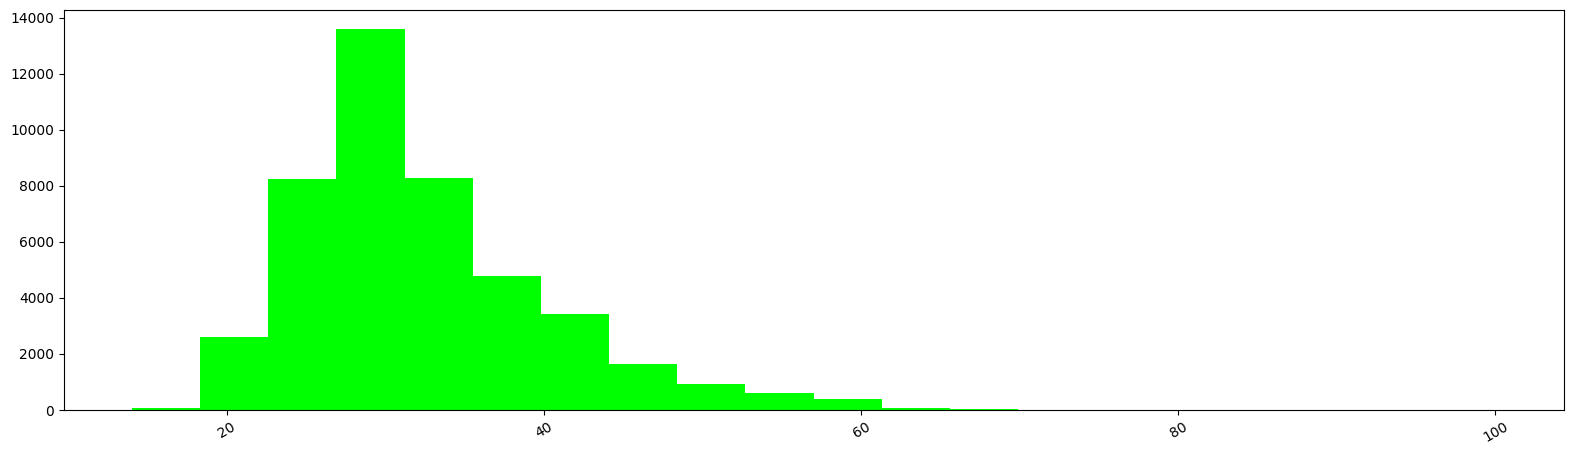

In [12]:
hh_db = joined.copy()

fig = plt.figure(figsize=(15, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=hh_db['Возраст'],label='test',color="lime",bins=20)
axes.xaxis.set_tick_params(rotation=30)

print(hh_db['Возраст'].mode())

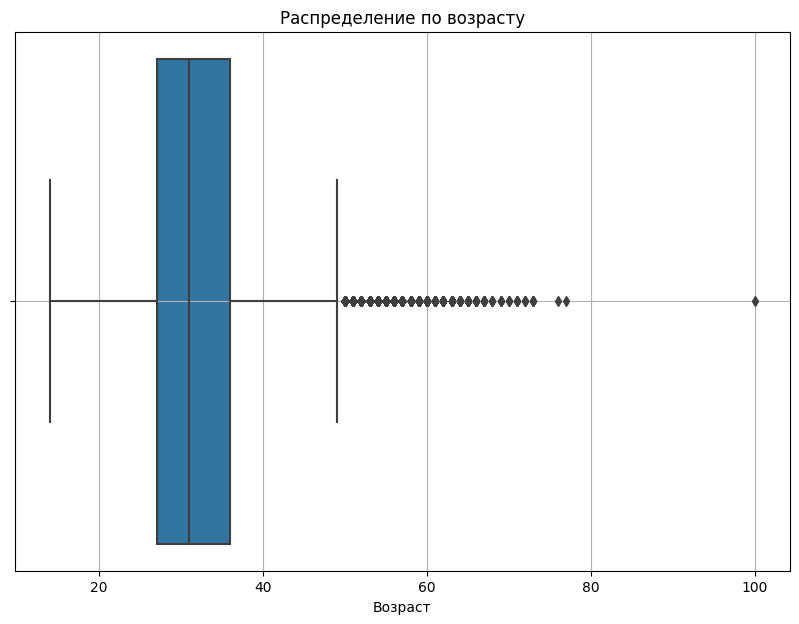

In [13]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=hh_db,
    #y='',
    x='Возраст',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по возрасту');
boxplot.set_xlabel('Возраст');
#boxplot.set_ylabel('Статус');
boxplot.grid()

1188.0


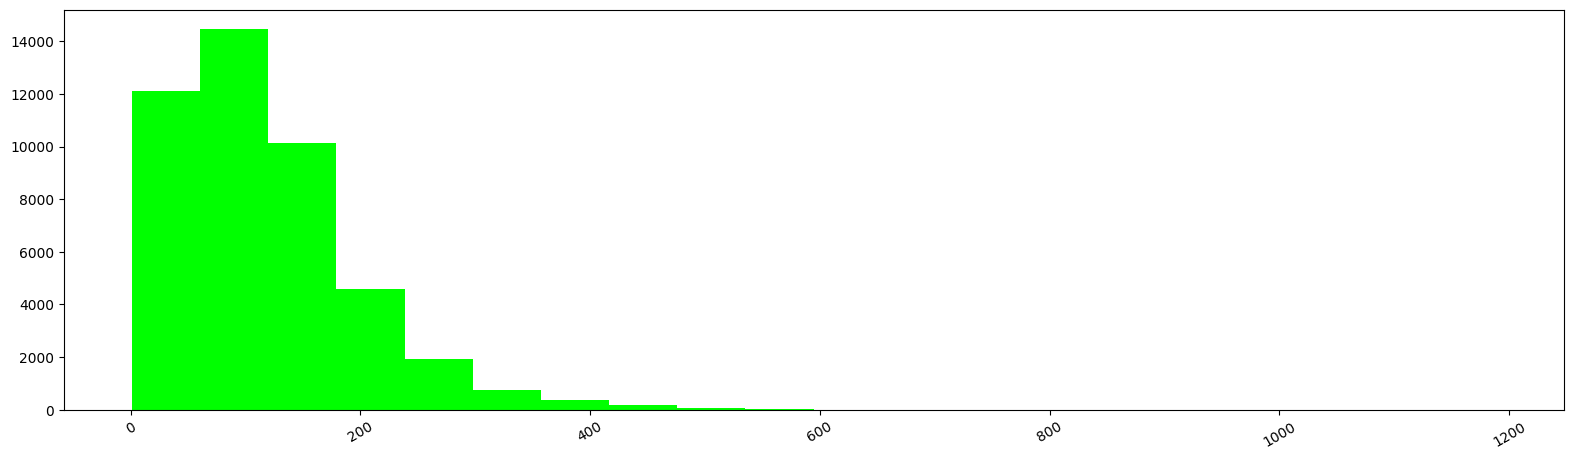

In [14]:
fig = plt.figure(figsize=(15, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=hh_db['Опыт работы (месяц)'],label='test',color="lime",bins=20)
axes.xaxis.set_tick_params(rotation=30)

print(hh_db['Опыт работы (месяц)'].max())

(5, 23)


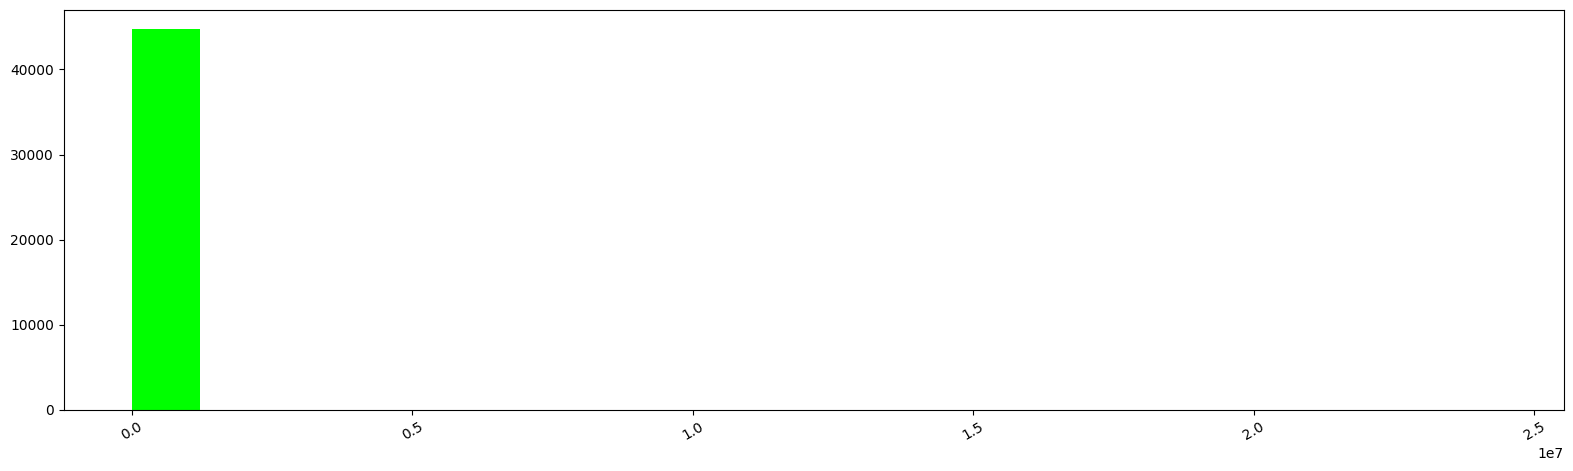

In [15]:
fig = plt.figure(figsize=(15, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=hh_db['ЗП (руб)'],label='test',color="lime",bins=20)
axes.xaxis.set_tick_params(rotation=30)

print(hh_db[hh_db['ЗП (руб)']>1000000].shape)

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


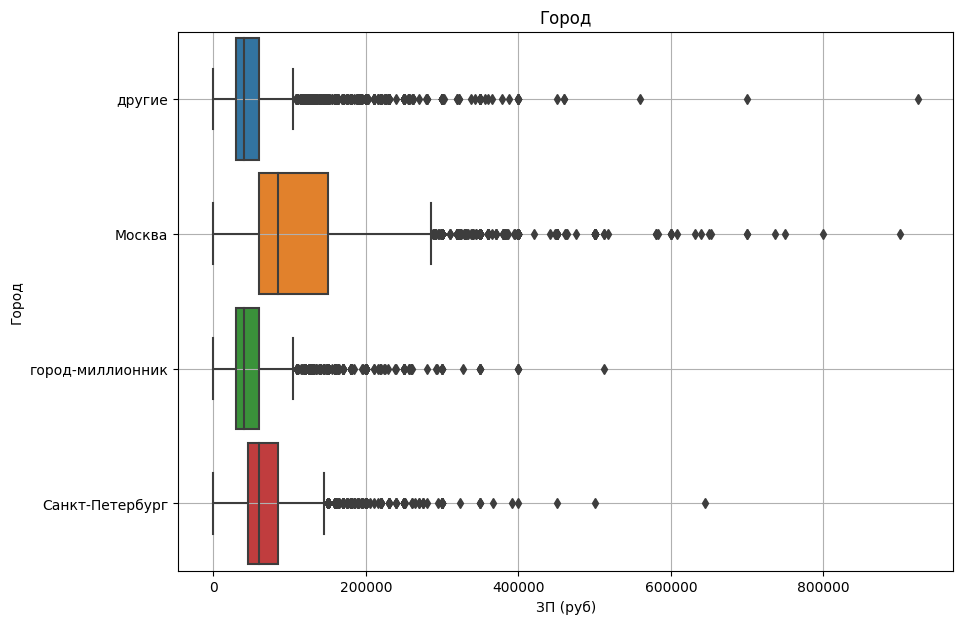

In [18]:
filtered = hh_db[hh_db['ЗП (руб)']<1000000]
print(filtered.groupby('Образование')['ЗП (руб)'].median())

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=filtered,
    y='Город',
    x='ЗП (руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Город');
boxplot.set_xlabel('ЗП (руб)');
#boxplot.set_ylabel('Статус');
boxplot.grid()

In [19]:
print(hh_db.groupby(['Готовность к переезду','Готовность к командировкам'])['ЗП (руб)'].median())



Готовность к переезду  Готовность к командировкам
False                  False                         40000.000
                       True                          60000.000
True                   False                         50000.000
                       True                          65849.455
Name: ЗП (руб), dtype: float64


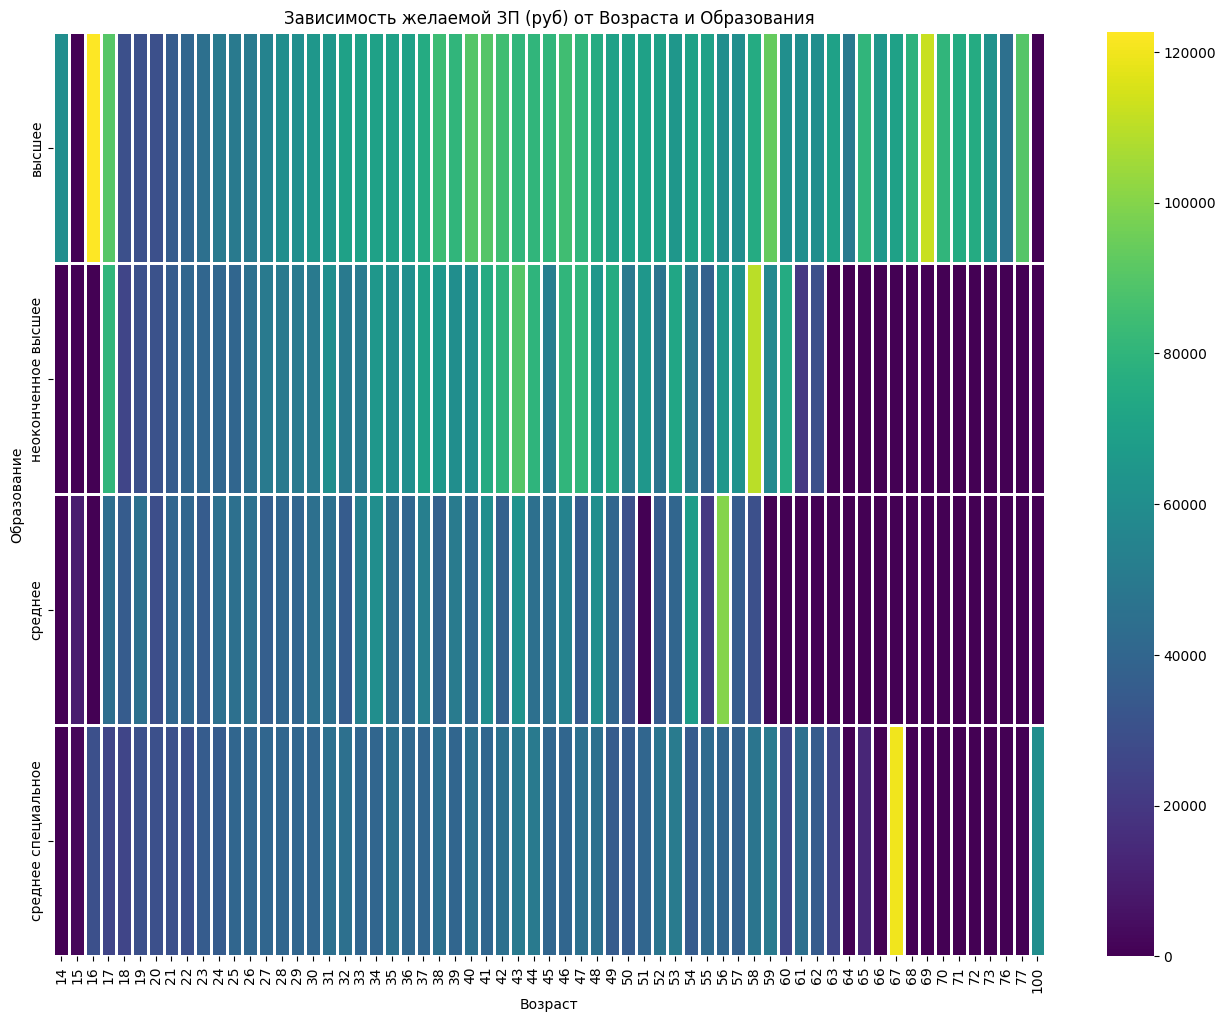

In [30]:
hh_pivot = hh_db.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)
#print(hh_pivot)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    hh_pivot,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    #ax = axes[0]
)
jb_heatmap.set_title('Зависимость желаемой ЗП (руб) от Возраста и Образования');
jb_heatmap.set_xlabel('Возраст');
jb_heatmap.set_ylabel('Образование');


             Ищет работу на должность:   
4535            Технический специалист  \
19351  Специалист (Junior-программист)   
19872                         Аналитик   
26477             Менеджер IT-проектов   
29098      Ведущий инженер-программист   
40015  Системный администратор Windows   
43451   Руководитель отдела разработки   

                         Последнее/нынешнее место работы   
4535                                                   а  \
19351                                  Русский свет, ООО   
19872                                           Kyivstar   
26477  М©й IT'M  ("Информационные Технологии' Менеджм...   
29098                           КБ Аметист, Концерн АГАТ   
40015                                     АО ТК Горизонт   
43451                                              ЛАНИТ   

                     Последняя/нынешняя должность Обновление резюме   
4535                                            а        2019-04-11  \
19351                                   

<Axes: title={'center': 'Взаимосвязь Опыта работы от Возраста'}, xlabel='Возраст', ylabel='Опыт работы (мес)'>

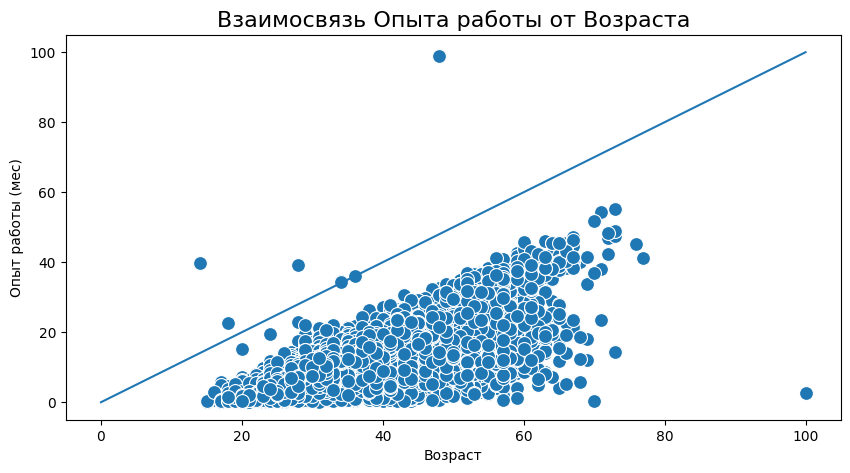

In [40]:
hh_buf = hh_db.copy()
hh_buf['Опыт работы (лет)'] = hh_buf['Опыт работы (месяц)']/12

print(hh_buf[hh_buf['Опыт работы (лет)']>(hh_buf['Возраст'])])

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=hh_buf,
    x='Возраст',
    y='Опыт работы (лет)',
    #hue='species',
    s=100,
    #size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь Опыта работы от Возраста', fontsize=16)
scatterplot.set_xlabel('Возраст')
scatterplot.set_ylabel('Опыт работы (мес)')

sns.lineplot(x=[0, 100], y=[0, 100])

In [60]:
duplicateRows = hh_db[hh_db.duplicated ()]
#print(duplicateRows)
hh_dbf = hh_db.copy()
hh_dbf_deduped = hh_dbf.drop_duplicates()
#print(f'Результирующее число записей: {hh_dbf_deduped.shape[0]}')

fill_data = hh_dbf_deduped.copy()

values = {'Опыт работы (месяц)': fill_data['Опыт работы (месяц)'].median()}
fill_data = fill_data.fillna(values)

fill_data = fill_data.dropna(how='any', axis=0)

hh_1 = fill_data[(fill_data['ЗП (руб)']<1000000)&(fill_data['ЗП (руб)']>1000)]

hh_2 = hh_1[hh_1['Опыт работы (месяц)']/12<(hh_1['Возраст'])]
print(hh_2.shape)


(44462, 23)
